In [1]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import colorsys
from matplotlib.colors import to_rgb, to_hex

os.chdir('/Users/cecileherbermann/Downloads/GSE203375_RAW')
# Load files
files = sorted(glob("GSM*_R1.genes.results.gz"))

# Extract FPKM values per file
fpkm_df = None
for file in files:
    sample_id = os.path.basename(file).split("_")[0]
    df = pd.read_csv(file, sep="\t", usecols=["gene_id", "FPKM"]).rename(columns={"FPKM": sample_id})
    if fpkm_df is None:
        fpkm_df = df
    else:
        fpkm_df = fpkm_df.merge(df, on="gene_id")

fpkm_df = fpkm_df.set_index("gene_id")

fpkm_df

,GSM6170585,GSM6170586,GSM6170587,GSM6170588,GSM6170589,GSM6170590,GSM6170591,GSM6170592,GSM6170593,GSM6170594,...,GSM6170626,GSM6170627,GSM6170628,GSM6170629,GSM6170630,GSM6170631,GSM6170632,GSM6170633,GSM6170634,GSM6170635
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,28.36,44.69,65.26,37.27,34.00,18.36,14.13,18.73,29.15,51.48,...,16.04,29.01,31.86,40.09,30.53,22.58,28.71,23.38,13.52,17.36
ENSG00000000005,1.62,4.74,3.47,0.00,0.07,0.24,12.41,35.86,1.32,4.69,...,5.12,0.31,0.87,0.44,0.07,0.00,0.06,0.03,1.89,4.11
ENSG00000000419,57.35,58.46,51.29,25.12,25.81,25.15,19.77,23.56,64.42,50.65,...,26.14,53.78,43.90,32.88,23.53,18.20,27.24,27.87,26.57,25.00
ENSG00000000457,1.44,2.57,3.59,3.07,3.56,2.57,2.08,3.66,1.80,2.94,...,3.94,1.26,1.81,6.02,5.12,1.76,3.58,2.72,3.36,2.95
ENSG00000000460,11.48,15.93,15.05,1.11,3.92,1.34,1.45,3.00,11.18,12.40,...,1.51,15.30,11.89,9.48,4.71,3.60,4.69,4.17,2.67,2.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285990,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000285991,0.54,0.02,0.00,0.00,0.00,0.00,0.00,0.07,0.10,0.03,...,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000285992,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


/var/folders/t5/y6q4yg6d25xgr09x591pz3580000gn/T/ipykernel_68884/2466465434.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap, norm = get_cmap("viridis"), Normalize(vmin=0, vmax=len(ranked_days)-1)


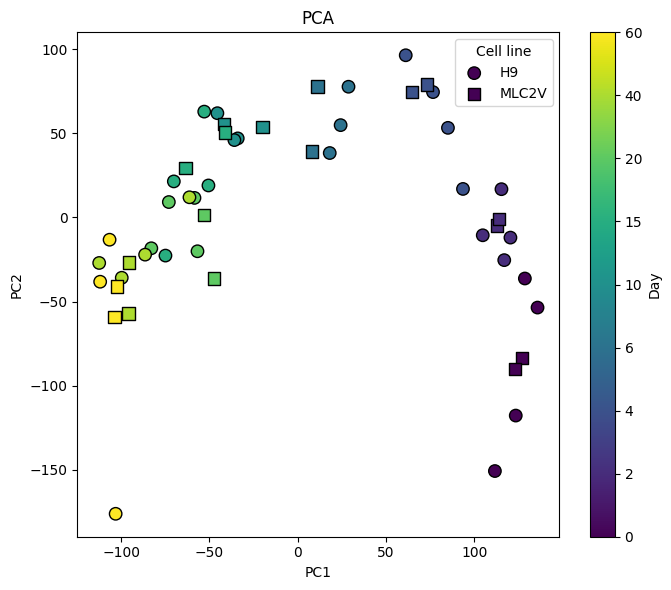

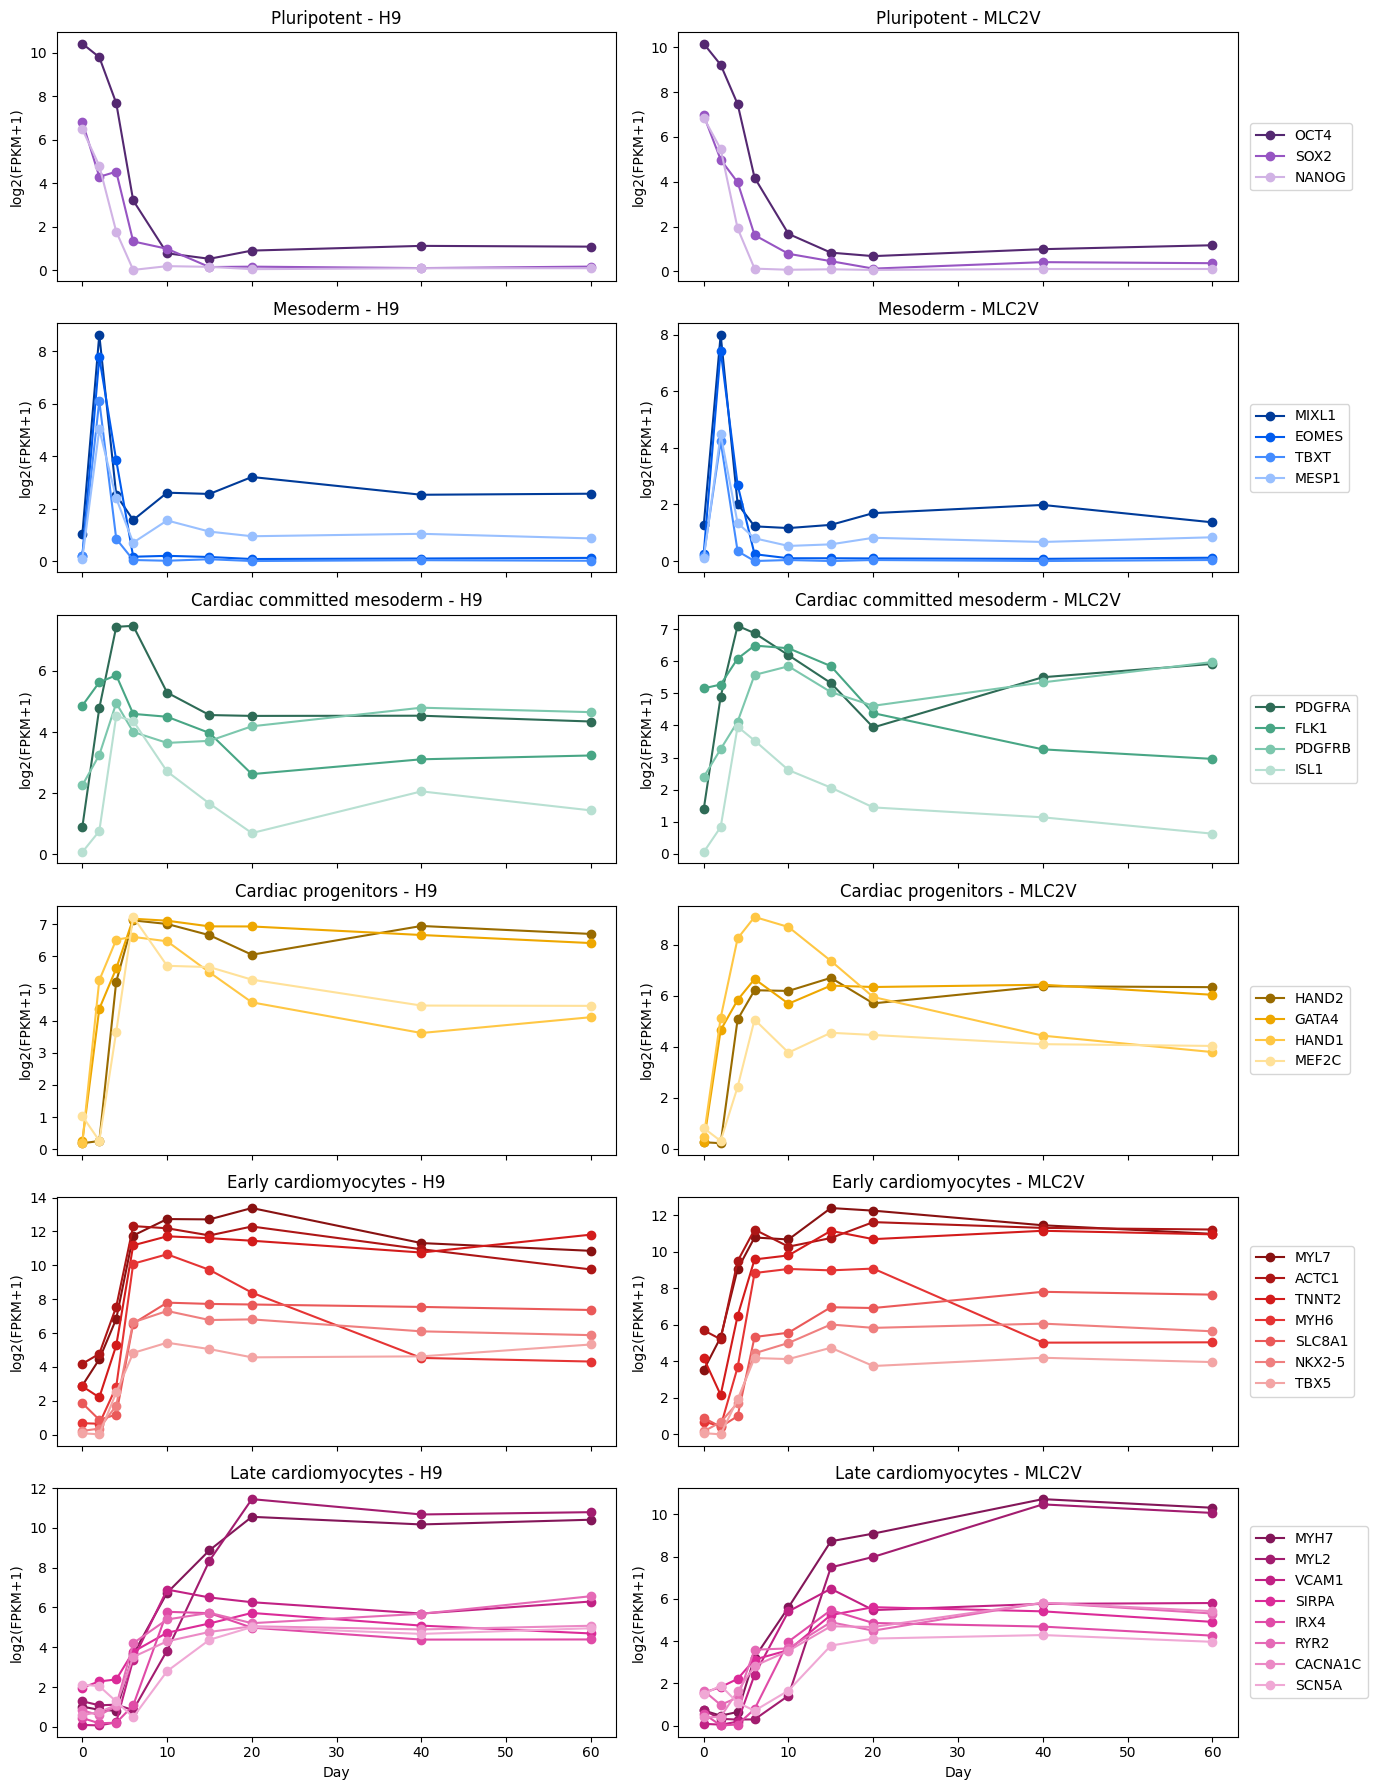

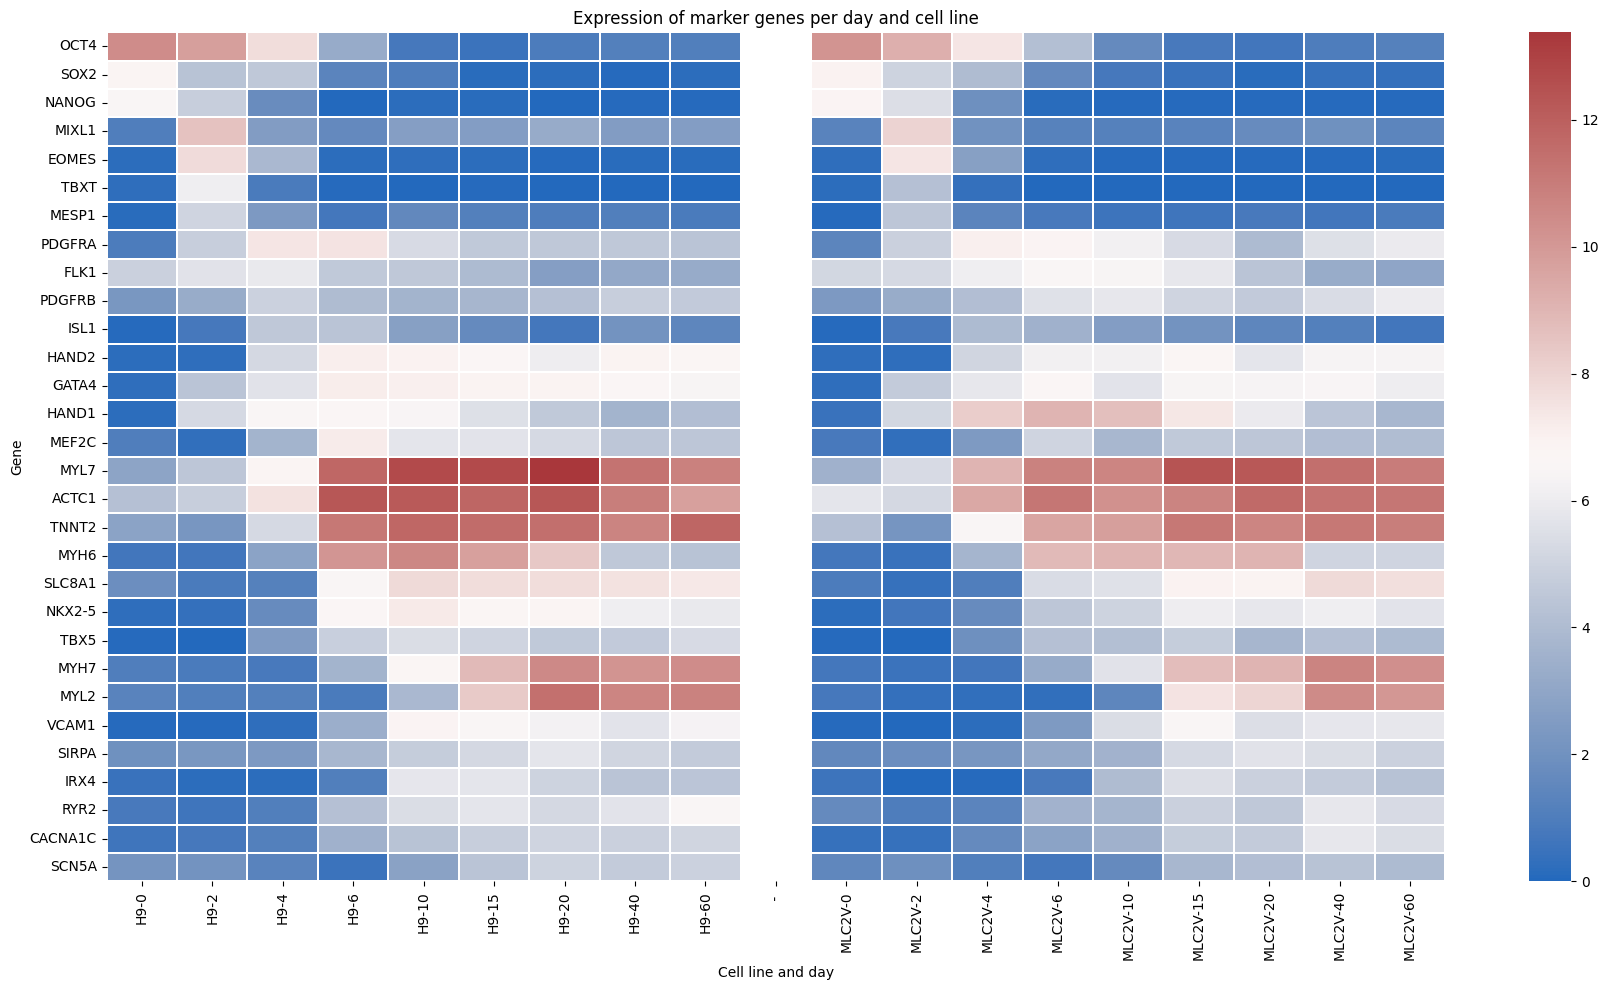

In [ ]:
# Sample metadata from GSM IDs
sample_info = {
    "GSM6170585": "Heart 28 Day 0 H9", "GSM6170586": "Heart 28 Day 2 H9", "GSM6170587": "Heart 28 Day 4 H9",
    "GSM6170588": "Heart 28 Day 10 H9", "GSM6170589": "Heart 28 Day 15 H9", "GSM6170590": "Heart 28 Day 20 H9",
    "GSM6170591": "Heart 28 Day 40 H9", "GSM6170592": "Heart 28 Day 60 H9", "GSM6170593": "Heart 30 Day 0 H9",
    "GSM6170594": "Heart 30 Day 2 H9", "GSM6170595": "Heart 30 Day 4 H9", "GSM6170596": "Heart 30 Day 6 H9",
    "GSM6170597": "Heart 30 Day 10 H9", "GSM6170598": "Heart 30 Day 15 H9", "GSM6170599": "Heart 30 Day 20 H9",
    "GSM6170600": "Heart 30 Day 40 H9", "GSM6170601": "Heart 30 Day 60 H9", "GSM6170602": "Heart 32 Day 0 H9",
    "GSM6170603": "Heart 32 Day 2 H9", "GSM6170604": "Heart 32 Day 4 H9", "GSM6170605": "Heart 32 Day 6 H9",
    "GSM6170606": "Heart 32 Day 15 H9", "GSM6170607": "Heart 32 Day 20 H9", "GSM6170608": "Heart 32 Day 40 H9",
    "GSM6170609": "Heart 32 Day 60 H9", "GSM6170610": "Heart 41 Day 0 H9", "GSM6170611": "Heart 41 Day 2 H9",
    "GSM6170612": "Heart 41 Day 4 H9", "GSM6170613": "Heart 41 Day 6 H9", "GSM6170614": "Heart 41 Day 10 H9",
    "GSM6170615": "Heart 41 Day 15 H9", "GSM6170616": "Heart 41 Day 20 H9", "GSM6170617": "Heart 41 Day 40 H9",
    "GSM6170618": "Heart 18 Day 0 MLC2V", "GSM6170619": "Heart 18 Day 2 MLC2V", "GSM6170620": "Heart 18 Day 4 MLC2V",
    "GSM6170621": "Heart 18 Day 6 MLC2V", "GSM6170622": "Heart 18 Day 10 MLC2V", "GSM6170623": "Heart 18 Day 15 MLC2V",
    "GSM6170624": "Heart 18 Day 20 MLC2V", "GSM6170625": "Heart 18 Day 40 MLC2V", "GSM6170626": "Heart 18 Day 60 MLC2V",
    "GSM6170627": "Heart 42 Day 0 MLC2V", "GSM6170628": "Heart 42 Day 2 MLC2V", "GSM6170629": "Heart 42 Day 4 MLC2V",
    "GSM6170630": "Heart 42 Day 6 MLC2V", "GSM6170631": "Heart 42 Day 10 MLC2V", "GSM6170632": "Heart 42 Day 15 MLC2V",
    "GSM6170633": "Heart 42 Day 20 MLC2V", "GSM6170634": "Heart 42 Day 40 MLC2V", "GSM6170635": "Heart 42 Day 60 MLC2V"
}
metadata = pd.DataFrame.from_dict(sample_info, orient="index", columns=["description"])
metadata["day"] = metadata["description"].str.extract(r"Day (\d+)", expand=False).astype(int)
metadata["cell_line"] = metadata["description"].str.extract(r"(H9|MLC2V)", expand=False)
metadata["heart"] = metadata["description"].str.extract(r"Heart (\d+)", expand=False)

# Align FPKM with metadata
fpkm_df = fpkm_df[metadata.index]
fpkm_df.columns = metadata["description"].values
metadata = metadata.set_index("description").loc[fpkm_df.columns]

# Log-transform
log_df = np.log2(fpkm_df + 1)

# PCA
X_scaled = StandardScaler().fit_transform(log_df.T)
pca = PCA(n_components=2).fit_transform(X_scaled)
pca_df = pd.DataFrame(pca, columns=["PC1", "PC2"], index=log_df.columns).join(metadata)
ranked_days = {d: i for i, d in enumerate(sorted(pca_df["day"].unique()))}
pca_df["day_rank"] = pca_df["day"].map(ranked_days)

cmap, norm = get_cmap("viridis"), Normalize(vmin=0, vmax=len(ranked_days)-1)
fig, ax = plt.subplots(figsize=(7, 6))
for cl, m in {"H9": "o", "MLC2V": "s"}.items():
    sub = pca_df[pca_df["cell_line"] == cl]
    ax.scatter(sub["PC1"], sub["PC2"], c=cmap(norm(sub["day_rank"])), label=cl, marker=m, edgecolor="k", s=80)
sm = ScalarMappable(cmap=cmap, norm=norm); sm.set_array([])
cb = plt.colorbar(sm, ax=ax, label="Day")
cb.set_ticks(list(ranked_days.values())); cb.set_ticklabels(list(ranked_days.keys()))
ax.set_title("PCA"); ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.legend(title="Cell line")
plt.tight_layout(); plt.show()

# Marker genes and stages
gene_map = {
    # Pluripotent
    "OCT4": "ENSG00000204531",
    "SOX2": "ENSG00000181449",
    "NANOG": "ENSG00000111704",

    # Mesoderm
    "MIXL1": "ENSG00000185155",
    "EOMES": "ENSG00000163508",
    "TBXT": "ENSG00000164458",
    "MESP1": "ENSG00000166823",

    # Cardiac committed mesoderm
    "PDGFRA": "ENSG00000134853",
    "FLK1": "ENSG00000128052",
    "PDGFRB": "ENSG00000113721",
    "ISL1": "ENSG00000016082",

    # Cardiac progenitors
    "HAND2": "ENSG00000164107",
    "GATA4": "ENSG00000136574",
    "HAND1": "ENSG00000113196",
    "MEF2C": "ENSG00000081189",

    # Early cardiomyocytes
    "MYL7": "ENSG00000106631",
    "ACTC1": "ENSG00000159251",
    "TNNT2": "ENSG00000118194",
    "MYH6": "ENSG00000197616",
    "SLC8A1": "ENSG00000183023",
    "NKX2-5": "ENSG00000183072",
    "TBX5": "ENSG00000089225",

    # Late cardiomyocytes
    "MYH7": "ENSG00000092054",
    "MYL2": "ENSG00000111245",
    "VCAM1": "ENSG00000162692",
    "SIRPA": "ENSG00000198053",
    "IRX4": "ENSG00000113430",
    "RYR2": "ENSG00000198626",
    "CACNA1C": "ENSG00000151067",
    "SCN5A": "ENSG00000183873"
}

stages = {
    "Pluripotent": ["OCT4", "SOX2", "NANOG"],
    "Mesoderm": ["MIXL1", "EOMES", "TBXT", "MESP1"],
    "Cardiac committed mesoderm": ["PDGFRA", "FLK1", "PDGFRB", "ISL1"],
    "Cardiac progenitors": ["HAND2", "GATA4", "HAND1", "MEF2C"],
    "Early cardiomyocytes": ["MYL7", "ACTC1", "TNNT2", "MYH6", "SLC8A1", "NKX2-5", "TBX5"],
    "Late cardiomyocytes": ["MYH7", "MYL2", "VCAM1", "SIRPA", "IRX4", "RYR2", "CACNA1C",  "SCN5A"]
}
stage_colors = dict(zip(stages, ["#9f62c8", "#75aaff", "#4fb390", "#ffc94a", "#e95353", "#dd389e"]))

marker_df = log_df.loc[[v for v in gene_map.values() if v in log_df.index]]
marker_df.index = [k for k, v in gene_map.items() if v in marker_df.index]

# Pool per day per cell line
pooled = []
for cl in ["H9", "MLC2V"]:
    for day in sorted(metadata[metadata["cell_line"] == cl]["day"].unique()):
        samples = metadata.query("cell_line == @cl and day == @day").index
        mean_vals = marker_df[samples].mean(axis=1)
        pooled.append(pd.DataFrame({
            "gene": mean_vals.index,
            "expression": mean_vals.values,
            "day": day,
            "cell_line": cl
        }))
pooled_df = pd.concat(pooled)

# Function to generate color shades
def hls_shades(hex_color, n, l_min=0.3, l_max=0.8):
    h, l, s = colorsys.rgb_to_hls(*to_rgb(hex_color))
    return [to_hex(colorsys.hls_to_rgb(h, l_, s)) for l_ in np.linspace(l_min, l_max, n)]

# Line plots for each stage and cell line
fig, axes = plt.subplots(len(stages), 2, figsize=(14, 3 * len(stages)), sharex=True)
for r, (stage, genes) in enumerate(stages.items()):
    valid = [g for g in genes if g in marker_df.index]
    for c, cl in enumerate(["H9", "MLC2V"]):
        ax = axes[r, c]
        for g, col in zip(valid, hls_shades(stage_colors[stage], len(valid))):
            subset = pooled_df.query("gene == @g and cell_line == @cl")
            ax.plot(subset["day"], subset["expression"], label=g, color=col, marker="o")
        ax.set_title(f"{stage} - {cl}")
        ax.set_ylabel("log2(FPKM+1)")
        if r == len(stages) - 1: ax.set_xlabel("Day")
        if c == 1: ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.tight_layout(); plt.show()

# Heatmap
ordered_genes = [g for stage in stages.values() for g in stage if g in marker_df.index]
heatmap = pooled_df.pivot_table(index="gene", columns=["cell_line", "day"], values="expression")
gap = pd.Series([np.nan] * len(heatmap), index=heatmap.index)
heatmap = pd.concat([
    heatmap[[col for col in heatmap if col[0] == "H9"]],
    pd.DataFrame({(" ", " "): gap}),
    heatmap[[col for col in heatmap if col[0] == "MLC2V"]]
], axis=1).reindex(ordered_genes)

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap, cmap="vlag", linewidths=0.3, xticklabels=True, yticklabels=True)
plt.title("Expression of marker genes per day and cell line")
plt.xlabel("Cell line and day"); plt.ylabel("Gene")
plt.tight_layout(); plt.show()